In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv('./solver-out-2023-04-13_151111322_(temp=10C, inc=1).txt')
df2 = pd.read_csv('./solver-out-2023-04-13_183146688_(temp=10C, inc=1)_has-Well+Perf.txt')
df.head()

,InletPressureBara,InletFlowrateKgps,InletTemperatureCelsius,ReservoirPressureBara,WasTwoPhase,WasLiquid,FluidPressureAtReservoirBara,FluidTemperatureAtReservoirCelsius,FluidPhaseAtReservoir,PressureStatus
0,140,132,10,40,False,True,88.854647,6.548960,Liquid,High
1,140,131,10,40,False,True,89.481044,6.567070,Liquid,High
2,140,130,10,40,False,True,90.101845,6.684956,Liquid,High
3,140,129,10,40,False,True,90.724649,6.747347,Liquid,High
4,140,128,10,40,False,True,91.347769,6.637653,Liquid,High


In [3]:
colors = {False:'tab:blue', True:'tab:orange'}

def draw_plot(df_plot, pressureBara, temperatureCelsius):
    print(f'Pressure = {pressureBara} Bara @ {temperatureCelsius}C')
    df_plot = df_plot.dropna()
    df_plot = df_plot[(df_plot['InletPressureBara'] == pressureBara)]
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(df_plot['InletFlowrateKgps'], df_plot['FluidPressureAtReservoirBara'], c=df_plot['WasTwoPhase'].map(colors))
    ax.set_xlabel('Inlet flowrate')
    ax.set_ylabel('Outlet pressure')

    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
    ax.legend(title='WasTwoPhase', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

Pressure = 69 Bara @ 10C


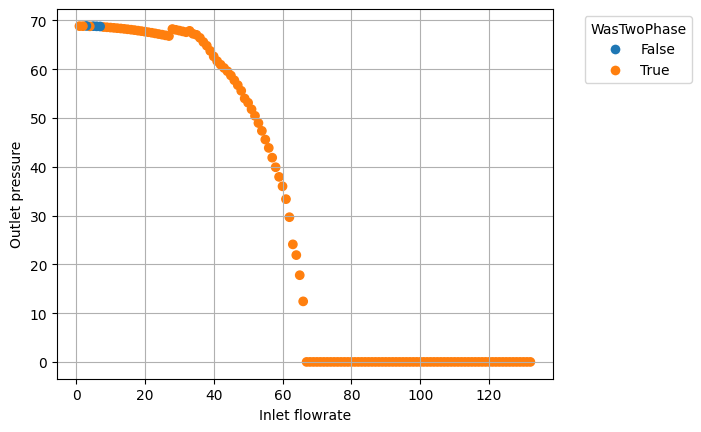

Pressure = 77 Bara @ 10C


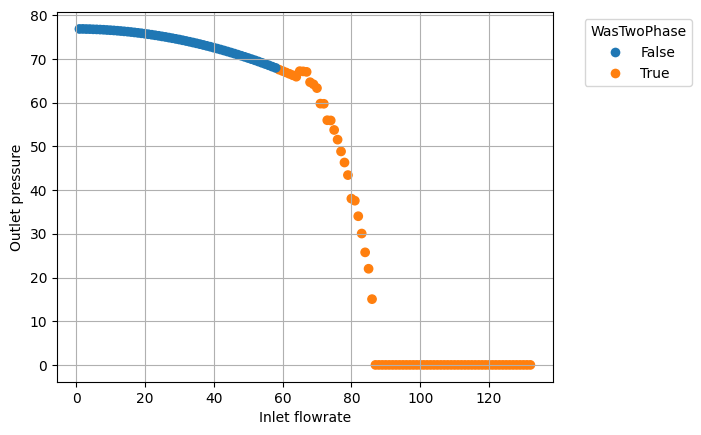

In [4]:
draw_plot(df, 69, 10)
draw_plot(df, 77, 10)


Pressure = 69 Bara @ 10C


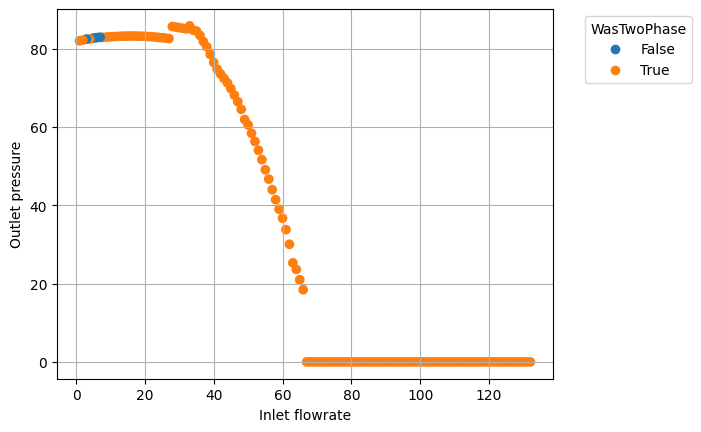

Pressure = 77 Bara @ 10C


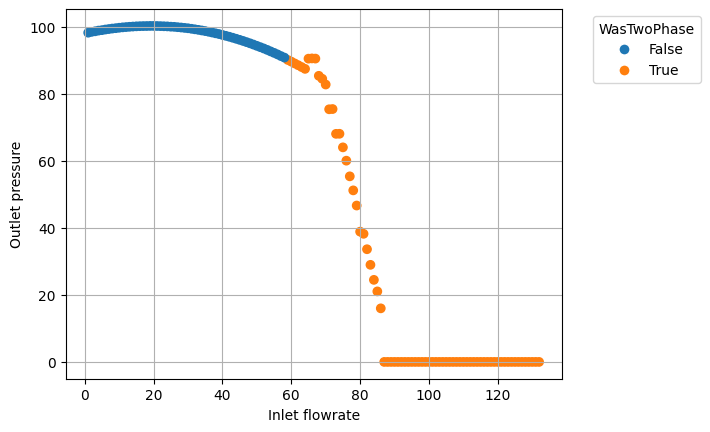

In [11]:
draw_plot(df2, 69, 10)
draw_plot(df2, 77, 10)


In [5]:
df.head()

,InletPressureBara,InletFlowrateKgps,InletTemperatureCelsius,ReservoirPressureBara,WasTwoPhase,WasLiquid,FluidPressureAtReservoirBara,FluidTemperatureAtReservoirCelsius,FluidPhaseAtReservoir,PressureStatus
0,140,132,10,40,False,True,88.854647,6.548960,Liquid,High
1,140,131,10,40,False,True,89.481044,6.567070,Liquid,High
2,140,130,10,40,False,True,90.101845,6.684956,Liquid,High
3,140,129,10,40,False,True,90.724649,6.747347,Liquid,High
4,140,128,10,40,False,True,91.347769,6.637653,Liquid,High


In [6]:
noTwoPhase = df.loc[(df['WasTwoPhase'] == False) & (df['FluidPressureAtReservoirBara'] > 0.01)]
noTwoPhase.head()

,InletPressureBara,InletFlowrateKgps,InletTemperatureCelsius,ReservoirPressureBara,WasTwoPhase,WasLiquid,FluidPressureAtReservoirBara,FluidTemperatureAtReservoirCelsius,FluidPhaseAtReservoir,PressureStatus
0,140,132,10,40,False,True,88.854647,6.548960,Liquid,High
1,140,131,10,40,False,True,89.481044,6.567070,Liquid,High
2,140,130,10,40,False,True,90.101845,6.684956,Liquid,High
3,140,129,10,40,False,True,90.724649,6.747347,Liquid,High
4,140,128,10,40,False,True,91.347769,6.637653,Liquid,High


In [7]:
grouped = noTwoPhase.groupby('InletPressureBara')

In [8]:
maxFR = noTwoPhase.loc[noTwoPhase.groupby('InletPressureBara')['FluidPressureAtReservoirBara'].idxmax()]

In [9]:
maxFR.loc[maxFR['InletFlowrateKgps'] > 1]

,InletPressureBara,InletFlowrateKgps,InletTemperatureCelsius,ReservoirPressureBara,WasTwoPhase,WasLiquid,FluidPressureAtReservoirBara,FluidTemperatureAtReservoirCelsius,FluidPhaseAtReservoir,PressureStatus
9501,69,3,10,40,False,True,68.873411,9.826676,Liquid,High
8446,77,2,10,40,False,True,76.904508,10.159886,Liquid,High


In [10]:
df.loc[(df['InletPressureBara'] == 77) & (df['InletFlowrateKgps'] <= 3)]

,InletPressureBara,InletFlowrateKgps,InletTemperatureCelsius,ReservoirPressureBara,WasTwoPhase,WasLiquid,FluidPressureAtReservoirBara,FluidTemperatureAtReservoirCelsius,FluidPhaseAtReservoir,PressureStatus
8445,77,3,10,40,False,True,76.875026,9.916840,Liquid,High
8446,77,2,10,40,False,True,76.904508,10.159886,Liquid,High
8447,77,1,10,40,False,True,76.895610,9.810933,Liquid,High
